# Hyperparamter Optimization

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import random

from bayes_opt import BayesianOptimization
gp_params = {"alpha": 1e-5, "n_restarts_optimizer": 2}

## Our Objective Function

In [2]:
def g(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

In [3]:
np.random.seed(42)
xs = np.arange(-2, 10, 0.1)
f = g(xs)

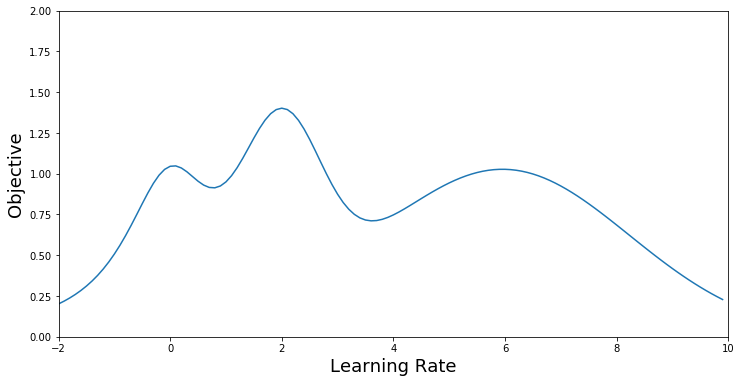

In [15]:
def plot_objective(): 
    plt.figure(figsize=(12, 6))
    plt.plot(xs, f)
    axes = plt.gca()
    axes.set_xlim([-2,10])
    axes.set_ylim([0,2])
    plt.xlabel('Learning Rate', fontsize=18)
    plt.ylabel('Objective', fontsize=18)
    plt.show()

plot_objective()

## Grid Search

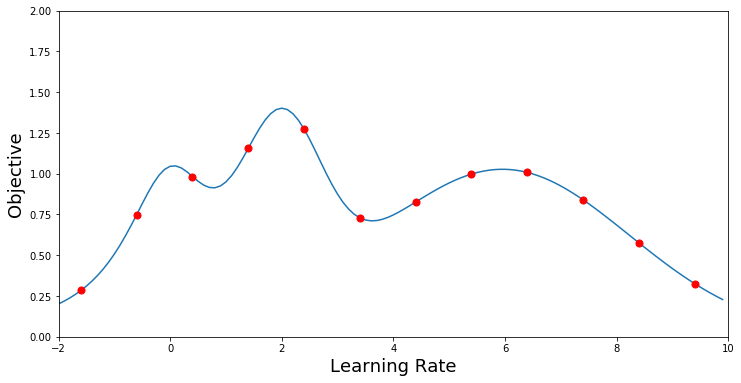

In [23]:
grid = np.arange(-1.6, 10, 1)
plt.figure(figsize=(12, 6))
plt.plot(xs, f)
axes = plt.gca()
axes.set_xlim([-2,10])
axes.set_ylim([0,2])
plt.xlabel('Learning Rate', fontsize=18)
plt.ylabel('Objective', fontsize=18)
plt.scatter(grid, g(grid), c='red', s=50, zorder=10)
plt.show()

## Random Search

[-0.62531379 -0.57808914 -0.10199518  0.94690367  2.17323776  2.74735306
  3.35125229  5.65540854  6.00906456  7.54935367  9.44211644  9.64896785]



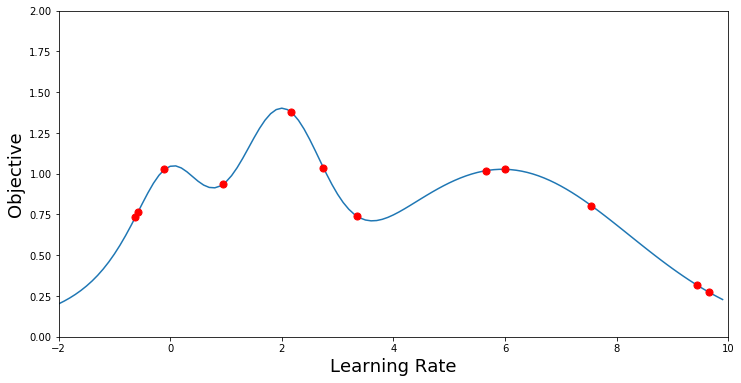

In [52]:
random_grid = np.asarray(sorted([random.uniform(-2, 10) for i in range(12)]))
print random_grid
print
plt.figure(figsize=(12, 6))
plt.plot(xs, f)
axes = plt.gca()
axes.set_xlim([-2,10])
axes.set_ylim([0,2])
plt.xlabel('Learning Rate', fontsize=18)
plt.ylabel('Objective', fontsize=18)
plt.scatter(random_grid, g(random_grid), c='red', s=50, zorder=10)
plt.show()

## GP Model

In [53]:
def plot_bo(f, bo):
    x_s = [x["x"] for x in bo.res["all"]["params"]]
    y_s = bo.res["all"]["values"]

    mean, sigma = bo.gp.predict(xs.reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    plt.plot(xs, f)
    plt.plot(xs, mean)
    plt.fill_between(xs, mean+sigma, mean-sigma, alpha=0.1)
    plt.scatter(bo.X.flatten(), bo.Y, c="red", s=50, zorder=10)
    plt.xlim(-2, 10)
    plt.ylim(-0, 2)
    plt.show()

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.05860 |   -4.0098 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    2 | 00m00s |    1.01966 |   -0.1230 | 
    3 | 00m00s |    0.94342 |    5.0000 | 
    4 | 00m00s |    1.20055 |    2.5148 | 
    5 | 00m01s |    1.09390 |    1.2995 | 
    6 | 00m01s |    0.20022 |   -2.0089 | 
    7 | 00m01s |    0.03847 |   -5.0000 | 
    8 | 00m01s |    0.72383 |    3.8339 | 
    9 | 00m01s |    0.52972 |   -0.9576 | 
   10 | 00m01s |    0.93065 |    0.5982 | 
   11 | 00m01s |    0.09997 |   -3.0056 | 
   12 | 00m01s |    1.40027 |    1.9576 | 
   13 | 00m02s |    0.84497 |    4.4879 | 


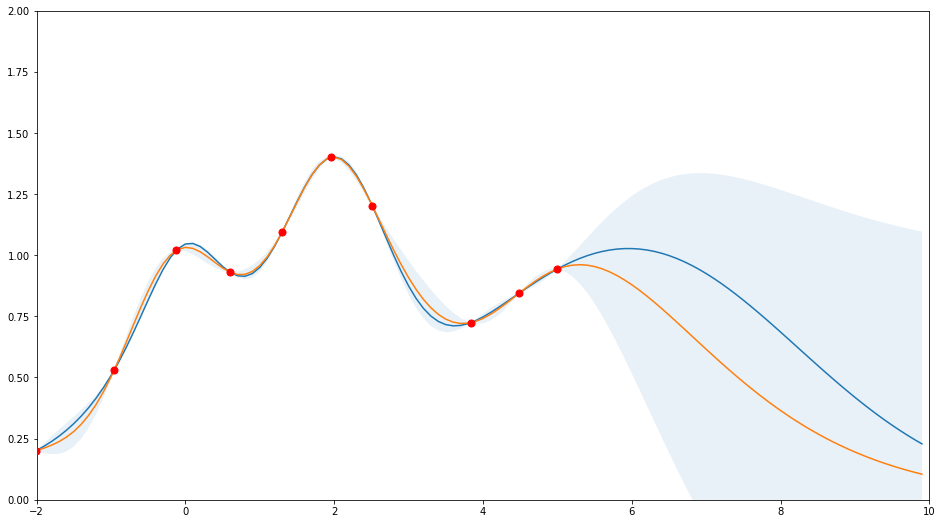

In [58]:
bo = BayesianOptimization(f=lambda x: g(x),
                          pbounds={"x": (-5, 5)},
                          verbose=1)

bo.maximize(init_points=1, n_iter=12, acq="ucb", kappa=10, **gp_params)

plot_bo(g(xs), bo)

In [48]:
x_s = [x["x"] for x in bo.res["all"]["params"]]

In [50]:
x_s

[2.3785537481358983,
 -5.0,
 5.0,
 -2.3264303037724807,
 3.6678660146740008,
 1.2715177673580627,
 -3.6936156762603307,
 -0.9907961617100307,
 2.9209727525363696,
 4.440588763583638]

In [51]:
mean, sigma = bo.gp.predict(xs.reshape(-1, 1), return_std=True)

In [52]:
mean

array([0.19388066, 0.20920763, 0.22717669, 0.24822903, 0.27278051,
       0.30119981, 0.33378426, 0.37073237, 0.4121122 , 0.45782448,
       0.5075594 , 0.56074645, 0.61652279, 0.67377548, 0.73121489,
       0.78744467, 0.84102909, 0.89056038, 0.93472884, 0.97239841,
       1.00269062, 1.02508007, 1.03950479, 1.04648927, 1.04718836,
       1.04325971, 1.03669764, 1.02967919, 1.02441811, 1.02302147,
       1.02734339, 1.03883078, 1.0583553 , 1.08602592, 1.12099193,
       1.16140688, 1.20464612, 1.2475631 , 1.28673039, 1.31867333,
       1.3401049 , 1.34817052, 1.3407118 , 1.31655845, 1.27585858,
       1.22043105, 1.15379501, 1.08061126, 1.00599765, 0.93485961,
       0.87121864, 0.81766902, 0.77538806, 0.74445035, 0.7241285 ,
       0.71316553, 0.71002773, 0.71314632, 0.72114524, 0.73295387,
       0.74776249, 0.76495091, 0.78402285, 0.80454413, 0.82608325,
       0.84815254, 0.87015837, 0.89140825, 0.91116566, 0.9287105 ,
       0.94340159, 0.95474252, 0.96242627, 0.96631754, 0.96641